<a href="https://colab.research.google.com/github/abalanonline/december/blob/main/v0.4/WaveGlow1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!rm -rf /root/.cache/torch
!mkdir -p /root/.cache/
!ln -sf /content/drive/MyDrive/cacheTorch /root/.cache/torch
!ls -l /root/.cache/torch/
import tensorflow; tensorflow.python.client.device_lib.list_local_devices()[-1].physical_device_desc

total 8
drwx------ 2 root root 4096 Dec 13 19:45 checkpoints
drwx------ 2 root root 4096 Dec 13 19:45 hub


'device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5'

In [2]:
!pip install unidecode #numpy scipy librosa inflect librosa

import matplotlib.pyplot as matplotlibpyplot
def plot_data(data, figsize=(16, 4)):
    fig, axes = matplotlibpyplot.subplots(1, len(data), figsize=figsize)
    for i in range(len(data)):
        axes[i].imshow(data[i], aspect='auto', origin='lower', 
                       interpolation='none', cmap='magma')

     |████████████████████████████████| 245kB 18.9MB/s 


In [3]:
import torch
tacotron2 = torch.hub.load('nvidia/DeepLearningExamples:torchhub', 'nvidia_tacotron2')
tacotron2 = tacotron2.to('cuda')
tacotron2.eval()
print(tacotron2._modules.keys())

from PyTorch.SpeechSynthesis.Tacotron2.tacotron2.data_function import TextMelLoader
args = type('duck', (), {})()
args.text_cleaners = 'english_cleaners'
args.max_wav_value = 32768
args.sampling_rate = 22050
args.load_mel_from_disk = False
args.filter_length = 1024
args.hop_length = 256
args.win_length = 1024
args.n_mel_channels = 80
args.mel_fmin = 0.0
args.mel_fmax = 8000.0
textMelLoader = TextMelLoader(".", "/dev/null", args)

mel_december = torch.unsqueeze(textMelLoader.get_mel('drive/MyDrive/audio.wav'), 0).cuda()

Using cache found in /root/.cache/torch/hub/nvidia_DeepLearningExamples_torchhub


odict_keys(['embedding', 'encoder', 'decoder', 'postnet'])


In [4]:
import torch
waveglow = torch.hub.load('nvidia/DeepLearningExamples:torchhub', 'nvidia_waveglow')
waveglow = waveglow.remove_weightnorm(waveglow)
waveglow = waveglow.to('cuda')
waveglow.eval()
print(waveglow._modules.keys())

Using cache found in /root/.cache/torch/hub/nvidia_DeepLearningExamples_torchhub


odict_keys(['upsample', 'WN', 'convinv'])


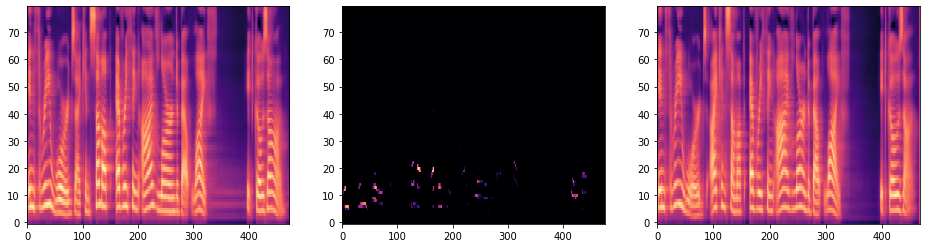

In [7]:
text = "In three words I can sum up everything I've learned about life: it goes on."

import numpy, scipy, IPython

# preprocessing
sequence = numpy.array(tacotron2.text_to_sequence(text, ['english_cleaners']))[None, :]
sequence = torch.from_numpy(sequence).to(device='cuda', dtype=torch.int64)

# run the models
with torch.no_grad():
    mel_outputs, mel_outputs_postnet, _, alignments = tacotron2.infer(sequence)
    audio = waveglow.infer(mel_outputs_postnet)
audio_numpy = audio[0].data.cpu().numpy()
rate = 22050

scipy.io.wavfile.write("test_audio.wav", rate, audio_numpy)
mel_wav = textMelLoader.get_mel('test_audio.wav')
try: # plot some old/new diagrams
    _ = mel_old
except NameError:
    mel_old = mel_outputs
plot_data((mel_outputs_postnet.data.cpu().numpy()[0],
           mel_wav.data.cpu().numpy(),
           mel_old.data.cpu().numpy()[0])) # alignments.data.cpu().numpy()[0].T
mel_old = mel_outputs_postnet

IPython.display.Audio(audio_numpy, rate=rate)

have fun